# `nb06`: Latent variable models

<img src="./figures/nb06/lvm.png" width="40%" />

In [1]:
import numpy as np
from scipy.stats import norm, multivariate_normal, dirichlet, multinomial
import matplotlib.pyplot as plt

# Probabilistic PCA

In [2]:
# Parameters
n_latents = 2
n_features = 10

B = np.random.rand(n_features, n_latents)   # Set to random values
mu = 0
sigma2 = 1

# Forward generative model
z = norm(0, 1).rvs(size=n_latents)
x = norm(np.dot(B, z) + mu, sigma2).rvs()

print("z =", z)
print("x =", x)

z = [0.38369876 1.77439179]
x = [ 0.87162369  3.22319256 -0.1022444  -1.59216259  1.47776616  0.28011997
  0.05102719  1.12167422  2.04900939  0.27803282]


# Mixture model

In [3]:
# Parameters
K = 3
N = 200

alpha = np.ones(K) * 1.5
sigma2_0 = 10.0

# Forward generative model
theta = dirichlet(alpha).rvs().ravel()
# theta is a K-dimensional vector of Dirichlet parameters
mu = multivariate_normal(np.zeros(2), sigma2_0).rvs(K)
# mu is a K-dimensional array of mean vectors


z = multinomial(1, theta).rvs(N)
z = np.argmax(z, axis=1)
x = np.zeros((N, 2))

for i in range(N):
    x[i] = multivariate_normal(mu[z[i]]).rvs()

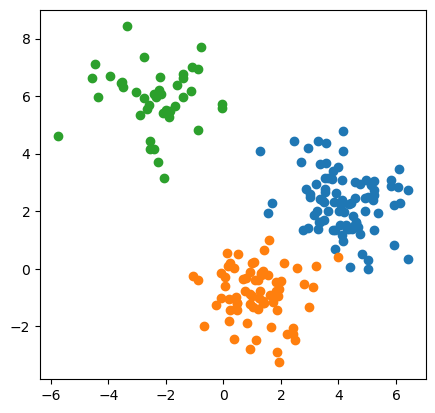

In [4]:
fig = plt.figure()
ax = plt.axes()

for k in range(K):
    ax.scatter(x[z == k, 0], x[z == k, 1])

ax.set(aspect="equal")
plt.show()

# Latent Dirichlet Allocation

<img src="./figures/nb06/lda.png" width="60%" /> 

(Reproduced from [Blei, 2011](https://www.eecis.udel.edu/~shatkay/Course/papers/UIntrotoTopicModelsBlei2011-5.pdf).)

- Each topic is a distribution over words
- Each document is a mixture of corpus-wide topics
- Each word is drawn from one of those topics

In [5]:
# Draw LDA as a graphical model



In [6]:
# Write a probabilistic generative model
# ...